In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

from sklearn.datasets import fetch_20newsgroups
import numpy as np

In [2]:
# cargamos los datos (ya separados de forma predeterminada en train y test)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [3]:
tfidfvect = TfidfVectorizer()


In [4]:
X_traing = tfidfvect.fit_transform(newsgroups_train.data)

In [5]:
X_traing

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1103627 stored elements and shape (11314, 101631)>

In [6]:
# recordar que las vectorizaciones por conteos son esparsas
# por ello sklearn convenientemente devuelve los vectores de documentos
# como matrices esparsas
print(type(X_traing))
print(f'shape: {X_traing.shape}')
print(f'Cantidad de documentos: {X_traing.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_traing.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 101631)
Cantidad de documentos: 11314
Tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [7]:
print(f'shape: {X_traing.shape}')
print(f'Cantidad de documentos: {X_traing.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_traing.shape[1]}')

shape: (11314, 101631)
Cantidad de documentos: 11314
Tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [8]:
tfidfvect.vocabulary_['car']

25775

In [10]:
y_train = newsgroups_train.target
y_train[:10]


array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [11]:
print(f'clases {np.unique(newsgroups_test.target)}')
newsgroups_test.target_names

clases [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
# Veamos similaridad de documentos. Tomemos algún documento
idx = 4811
print(newsgroups_train.data[idx])

THE WHITE HOUSE

                  Office of the Press Secretary
                   (Pittsburgh, Pennslyvania)
______________________________________________________________
For Immediate Release                         April 17, 1993     

             
                  RADIO ADDRESS TO THE NATION 
                        BY THE PRESIDENT
             
                Pittsburgh International Airport
                    Pittsburgh, Pennsylvania
             
             
10:06 A.M. EDT
             
             
             THE PRESIDENT:  Good morning.  My voice is coming to
you this morning through the facilities of the oldest radio
station in America, KDKA in Pittsburgh.  I'm visiting the city to
meet personally with citizens here to discuss my plans for jobs,
health care and the economy.  But I wanted first to do my weekly
broadcast with the American people. 
             
             I'm told this station first broadcast in 1920 when
it reported that year's presidential elec

In [13]:
print(X_traing[idx])

cossim = cosine_similarity(X_traing[idx], X_traing)[0]
np.sort(cossim)[::-1]


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 503 stored elements and shape (1, 101631)>
  Coords	Values
  (0, 95844)	0.007271364929980733
  (0, 48754)	0.01250208948987886
  (0, 88638)	0.007239755762436952
  (0, 60560)	0.02378091542959228
  (0, 68080)	0.05783509729841275
  (0, 88767)	0.11436591958947155
  (0, 88532)	0.30162648422875893
  (0, 68781)	0.01732920370281441
  (0, 51326)	0.11872942476534601
  (0, 89360)	0.20499358150556596
  (0, 21987)	0.01776383956898638
  (0, 41715)	0.021264144671994705
  (0, 83426)	0.01373621323440865
  (0, 49447)	0.10927241214997854
  (0, 67670)	0.21607851978307605
  (0, 51136)	0.07180143113783617
  (0, 17936)	0.02937453038855753
  (0, 54632)	0.06746842433018506
  (0, 25590)	0.03407363230755137
  (0, 99911)	0.022818471295422568
  (0, 96433)	0.020706676273530854
  (0, 59079)	0.01172650351079585
  (0, 68409)	0.012771381673781912
  (0, 100208)	0.05224419705476431
  (0, 45885)	0.06314558310564244
  :	:
  (0, 90207)	0.02720117228631943
  (0, 77

array([1.        , 0.70930477, 0.67474953, ..., 0.        , 0.        ,
       0.        ], shape=(11314,))

In [14]:
np.argsort(cossim)[::-1]


array([ 4811,  6635,  4253, ...,  1534, 10055,  4750], shape=(11314,))

In [15]:
mostsim = np.argsort(cossim)[::-1][1:6]
mostsim


array([6635, 4253, 3596, 4271, 3746])

In [16]:
newsgroups_train.target_names[y_train[idx]]


'talk.politics.misc'

In [17]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc


In [18]:
# es muy fácil instanciar un modelo de clasificación Naïve Bayes y entrenarlo con sklearn
clf = MultinomialNB()
clf.fit(X_traing, y_train)

MultinomialNB()

In [19]:
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf.predict(X_test)

In [20]:
f1_score(y_test, y_pred, average='macro')


0.5854345727938506

## Desafio 1

### Vectorizar documentos

In [21]:
random_documents =  np.random.choice(X_traing.shape[0], size=5, replace=False)

def compute_cosine_similarity(index, X):
    cossim = cosine_similarity(X[index], X)[0]
    print(f"******* documento index {index} *****")
    print("Los Documentos mas similares")
    mostsim = np.argsort(cossim)[::-1][1:6]
    print(mostsim)
    class_belong = newsgroups_train.target_names[y_train[index]]
    print(f"Clase a la que pertenece el documento {class_belong}")
    print("Los documentos similares a que clase pertencen:")
    similarity_class = [newsgroups_train.target_names[y_train[mostidx]] for mostidx in mostsim]
    print("\\\n".join(similarity_class))
    print(f"*************************************")

In [22]:
for randon_document in random_documents:
    compute_cosine_similarity(randon_document, X_traing)

******* documento index 4478 *****
Los Documentos mas similares
[6693 5339   62 5273  726]
Clase a la que pertenece el documento comp.sys.mac.hardware
Los documentos similares a que clase pertencen:
comp.sys.mac.hardware\
comp.sys.mac.hardware\
comp.sys.mac.hardware\
comp.sys.mac.hardware\
comp.sys.mac.hardware
*************************************
******* documento index 730 *****
Los Documentos mas similares
[6418 8446 9629 5148 6207]
Clase a la que pertenece el documento rec.autos
Los documentos similares a que clase pertencen:
rec.autos\
rec.autos\
sci.electronics\
rec.autos\
rec.motorcycles
*************************************
******* documento index 1399 *****
Los Documentos mas similares
[ 9323  7545 10575 10165 10344]
Clase a la que pertenece el documento sci.space
Los documentos similares a que clase pertencen:
sci.space\
sci.space\
sci.crypt\
sci.space\
sci.space
*************************************
******* documento index 5775 *****
Los Documentos mas similares
[8884 4989 

Observaciones:
- Se puede observar para el index del primero documento 10004 el contenido es de caracter religioso y encuentra similitud con categorías religiosas como cristianismo y ateísmo.
- Para el segundo index 2341 la relación de similitud en el contexto y la categoría abarca categorías que inicialmente no podrían estar relacionadas pero el contexto podría añadir esa similitud, ya que la categoría computadoras gráficas inicialmente no podría estar relacionada con deportes hockey.
- Para el tercer index 6112 se encuentra bastante similitud en los documentos con categoría de religion y politica a exepción de la subcategoría de windos y computadores que parece ser de alguna forma el contexto se relaciona.
- Para el cuarto index 10524 se abarca gran similitud con todo lo relacionado a computo ya que la clase del documento es electronica y las clases similares tienen relación a computación y electronica.
- Para el último index 4827 se podría decir que hay una fuerta similitud entre contexto y categoría ya que todas pertencen a la misma categoría y haciendo un print del documento y sus similares parece ser que hacen parte de una conversación por correo con sus respectivas replicas.

In [23]:
print(newsgroups_train.data[4827])

[reply to geb@cs.pitt.edu (Gordon Banks)]
 
 
 
I think a case could be made that this is discriminatory, particularly
if an applicant had good board scores and recommendations but wasn't
offered an interview, but I don't know if it has ever gone to court.


In [24]:
print(newsgroups_train.data[6512])

[reply to geb@cs.pitt.edu (Gordon Banks)]
 
 
 
I made a decision a while back that I will not be bullied into getting
studies like a CT or MRI when I don't think they are indicated.  If the
patient won't accept my explanation of why I think the study would be a
waste of time and money, I suggest a second opinion.


In [25]:

print(newsgroups_train.data[8550])



So just what was it you wanted to say?



-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 


In [26]:
#[6512 8550 8660 1338 3652]

print(newsgroups_train.data[8660])



By law, they would not be allowed to do that anyhow.




-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 


In [27]:
print(newsgroups_train.data[1338])


Yes, I remember that now.  Well, in that case, the cones are indeed
color sensitive, contrary to what the original respondent had claimed.
-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 


In [28]:
print(newsgroups_train.data[3652])



"Diet Evangelist".  Good term.  Fits Atkins to a "T".  


-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 


### Entrenar modelos de clasificación 

In [29]:
tfidfvect = TfidfVectorizer(
    min_df=5, #ignore terms that have a document frecuenqy lower than  5
    max_df=0.5, #50% igonre terms that have a document frecuency higher than 0.5 %percentage 
    sublinear_tf = True #reduce the impact of high term frecuency use 1 + log(tf)
)



In [30]:

target_names = newsgroups_train.target_names
y_train, y_test = newsgroups_train.target, newsgroups_test.target

X_train = tfidfvect.fit_transform(newsgroups_train.data)


In [31]:
X_test = tfidfvect.transform(newsgroups_test.data)
clf = MultinomialNB()

In [32]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

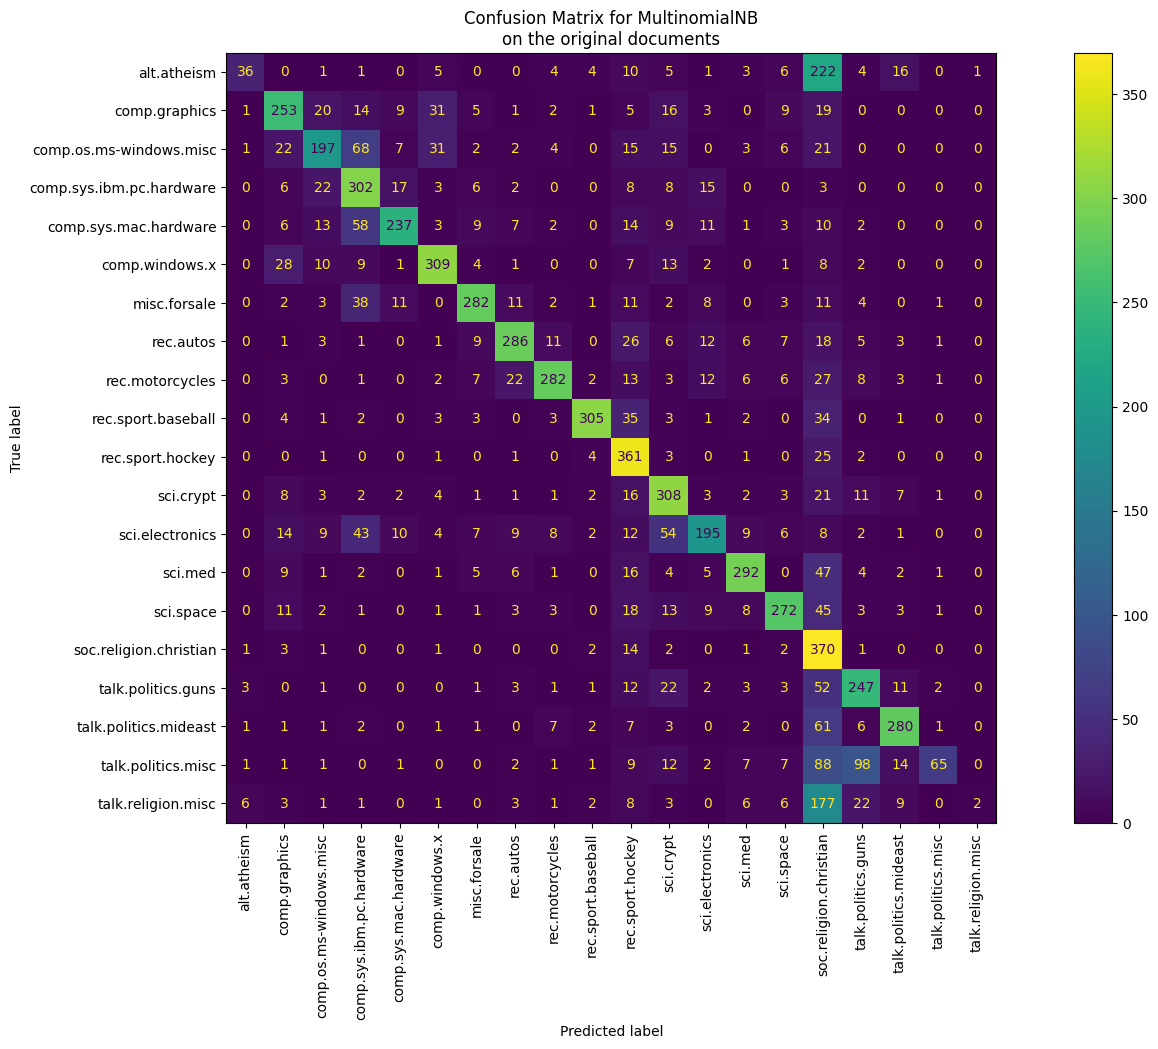

In [33]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay


num_classes = len(target_names)
fig, ax = plt.subplots(figsize=(min(20, num_classes), min(15, num_classes // 2)))

disp = ConfusionMatrixDisplay.from_predictions(
    y_test, 
    pred, 
    ax=ax, 
    display_labels=target_names,
    xticks_rotation=90
)

ax.set_title(f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")

plt.show()

In [34]:
def plot_fi_scores(y_test, pred, average, model):
    fi_score = f1_score(y_test, pred, average=average)
    print(f"The f1_score for {model} is {fi_score}")

In [35]:
complement_model = ComplementNB()

complement_model.fit(X_train, y_train)
pred_complement = complement_model.predict(X_test)

In [36]:
plot_fi_scores(y_test, pred, "macro", "MultinomialNB")
plot_fi_scores(y_test, pred_complement, "macro", "ComplementNB")

The f1_score for MultinomialNB is 0.619124580500289
The f1_score for ComplementNB is 0.6842208671869908


Se puede observar que luego de ajustar los parámetros de la vectorizador de texto **TfidfVectorizer** mejor el f1_score ya que los parámetros min_df y max_df ignorar términos con cierta frecuencia que aparecen en los documentos en los basado en un threshold mejorando la predicción del modelo. También se puede observar que ComplementNB tiene mejor performance ya que este algoritmo performa mejor para clases no balanceadas, menor sensibilidad y categorías raras.

### Transponer la matriz documento-término 

In [37]:
print(type(X_train))
print(f'shape: {X_train.shape}')
print(f'Cantidad de documentos: {X_train.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_train.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 18092)
Cantidad de documentos: 11314
Tamaño del vocabulario (dimensionalidad de los vectores): 18092


In [38]:
transpose_X_train = X_train.T

print(type(transpose_X_train))
print(f'shape: {transpose_X_train.shape}')
print(f'Tamaño del vocabulario: {transpose_X_train.shape[0]}')
print(f'Cantidad de documentos: {transpose_X_train.shape[1]}')

<class 'scipy.sparse._csc.csc_matrix'>
shape: (18092, 11314)
Tamaño del vocabulario: 18092
Cantidad de documentos: 11314


In [39]:
words = tfidfvect.get_feature_names_out() #get the words
selected_words = ["computer", "technology", "science", "data", "network"]
indices = [np.where(words == word)[0][0] for word in selected_words]

In [47]:
for index in indices:
    cossim = cosine_similarity(transpose_X_train[index], transpose_X_train)[0]
    mostsim = np.argsort(cossim)[::-1][1:6]
    print(f"******* palabra {words[index]} *****")
    print("Las 5 palabras mas similares son:")
    similarity_word = [words[mostidx] for mostidx in mostsim]
    print(similarity_word)

    

    

******* palabra computer *****
Las 5 palabras mas similares son:
['shopper', 'my', 'on', 'with', 'science']
******* palabra technology *****
Las 5 palabras mas similares son:
['nis', 'institute', 'hdtv', 'superhighways', 'technological']
******* palabra science *****
Las 5 palabras mas similares son:
['scientific', 'cognitivists', 'behaviorists', 'scientists', 'fiction']
******* palabra data *****
Las 5 palabras mas similares son:
['transfer', 'on', 'be', 'from', 'mead']
******* palabra network *****
Las 5 palabras mas similares son:
['novell', 'workgroups', 'utilizing', 'visualization', 'neuron']


Se eligió 5 palabras manualmente seleccionadas computer, technology, science, data, network y se lográ observar la similaridad tiene sentido en la mayoría de las palabras match.